In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import sqlite3

In [3]:
data_dictionary_path = 'hospital_data/dictionary/data_dictionary.csv'
data_dictionary = pd.read_csv(data_dictionary_path)
data_dictionary

,Table,Field,Description
0,encounters,NaN,Patient encounter data
1,encounters,Id,Primary Key. Unique Identifier of the encounter.
2,encounters,Start,The date and time (iso8601 UTC Date (yyyy-MM-d...
3,encounters,Stop,The date and time (iso8601 UTC Date (yyyy-MM-d...
4,encounters,Patient,Foreign key to the Patient.
...,...,...,...
60,procedures,Code,Procedure code from SNOMED-CT
61,procedures,Description,Description of the procedure.
62,procedures,Base_Cost,The line item cost of the procedure.
63,procedures,ReasonCode,Diagnosis code from SNOMED-CT specifying why t...


In [4]:
# Load all the CSV hospital_data files to get an initial impression of the datasets
encounters_path = 'hospital_data/data_tables/encounters.csv'
patients_path = 'hospital_data/data_tables/patients.csv'
organizations_path = 'hospital_data/data_tables/organizations.csv'
payers_path = 'hospital_data/data_tables/payers.csv'
procedures_path = 'hospital_data/data_tables/procedures.csv'

In [5]:
# Load each CSV into a DataFrame
encounters_df = pd.read_csv(encounters_path)
patients_df = pd.read_csv(patients_path)
organizations_df = pd.read_csv(organizations_path)
payers_df = pd.read_csv(payers_path)
procedures_df = pd.read_csv(procedures_path)

In [6]:
encounters_df

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03T14:32:11Z,2011-01-03T14:47:11Z,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03T16:24:45Z,2011-01-03T16:39:45Z,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03T17:36:53Z,2011-01-03T17:51:53Z,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27886,917bb534-2ed3-e1f5-ac27-74f314d19c63,2022-01-29T11:42:06Z,2022-01-29T11:57:06Z,0c122290-8c15-77ac-b418-2fea4e8a8e6a,d78e84ec-30aa-3bba-a33a-f29a3a454662,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,outpatient,185349003,Encounter for check up (procedure),85.55,85.55,24.27,NaN,NaN
27887,07710480-9d6b-9c9b-87c3-c1d54df4069d,2022-01-29T20:12:53Z,2022-01-29T20:27:53Z,20a4bc24-6b69-2f5c-dc74-1df390cae25b,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,urgentcare,702927004,Urgent care clinic (procedure),142.58,10588.34,8438.67,NaN,NaN
27888,01b57f06-cebe-a3e4-4423-a796ffb0c35d,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,424619006,Prenatal visit,142.58,11984.29,0.00,72892002.0,Normal pregnancy
27889,7d435668-0813-eb3b-0f26-cb741fb39561,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,408.80,0.00,NaN,NaN


In [7]:
patients_df

,Id,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,nonhispanic,F,Wakefield Massachusetts US,510 Little Station Unit 69,Quincy,Massachusetts,Norfolk County,2186.0,42.290937,-70.975503
1,6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NaN,Mr.,Zane918,Hodkiewicz467,NaN,NaN,M,white,nonhispanic,M,Brookline Massachusetts US,747 Conn Throughway,Boston,Massachusetts,Suffolk County,2135.0,42.308831,-71.063162
2,8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NaN,Mr.,Quinn173,Marquardt819,NaN,NaN,M,white,nonhispanic,M,Gardner Massachusetts US,816 Okuneva Extension Apt 91,Quincy,Massachusetts,Norfolk County,2170.0,42.265177,-70.967085
3,770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Mr.,Abel832,Smitham825,NaN,NaN,M,white,hispanic,M,Randolph Massachusetts US,127 Cole Way Unit 95,Boston,Massachusetts,Suffolk County,2118.0,42.334304,-71.066801
4,f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Mr.,Edwin773,Labadie908,NaN,NaN,M,white,hispanic,M,Stow Massachusetts US,976 Ziemann Gateway,Boston,Massachusetts,Suffolk County,2125.0,42.346771,-71.058813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,d684571e-a784-ef61-429e-06fa0d2b1637,1924-03-15,NaN,Mr.,Chris95,Fisher429,NaN,NaN,S,white,nonhispanic,M,Franklin Massachusetts US,810 Yundt Forge Suite 2,Medford,Massachusetts,Middlesex County,2145.0,42.357626,-71.040837
970,13c6f26e-17b7-f534-04db-78a26b26018d,1940-10-31,NaN,Mrs.,Berneice173,Heaney114,NaN,Hermiston71,M,white,nonhispanic,F,Templeton Massachusetts US,617 MacGyver Pathway,Boston,Massachusetts,Suffolk County,2152.0,42.331490,-71.039520
971,521e998b-ff0e-767f-b0ee-2bdf1168d66c,1943-04-18,NaN,Mr.,Jamal145,VonRueden376,NaN,NaN,M,white,nonhispanic,M,Chelmsford Massachusetts US,505 Mertz Path Apt 40,Boston,Massachusetts,Suffolk County,2134.0,42.341971,-71.040624
972,b57e24a2-2e48-12f9-3293-c88745cfdc3f,1941-04-28,NaN,Mrs.,Chrissy459,Rempel203,NaN,Beer512,M,asian,nonhispanic,F,Needham Massachusetts US,366 Beer Crossroad,Cambridge,Massachusetts,Middlesex County,NaN,42.337040,-71.094676


In [8]:
organizations_df

,Id,NAME,ADDRESS,CITY,STATE,ZIP,LAT,LON
0,d78e84ec-30aa-3bba-a33a-f29a3a454662,MASSACHUSETTS GENERAL HOSPITAL,55 FRUIT STREET,BOSTON,MA,2114,42.362813,-71.069187


In [9]:
payers_df

,Id,NAME,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE
0,b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323
1,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227
2,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Medicaid,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323
3,d47b3510-2895-3b70-9897-342d681c769d,Humana,500 West Main St,Louisville,KY,40018.0,1-844-330-7799
4,6e2f1a2d-27bd-3701-8d08-dae202c58632,Blue Cross Blue Shield,Michigan Plaza,Chicago,IL,60007.0,1-800-262-2583
5,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,UnitedHealthcare,9800 Healthcare Lane,Minnetonka,MN,55436.0,1-888-545-5205
6,4d71f845-a6a9-3c39-b242-14d25ef86a8d,Aetna,151 Farmington Ave,Hartford,CT,6156.0,1-800-872-3862
7,047f6ec3-6215-35eb-9608-f9dda363a44c,Cigna Health,900 Cottage Grove Rd,Bloomfield,CT,6002.0,1-800-997-1654
8,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,Anthem,220 Virginia Ave,Indianapolis,IN,46204.0,1-800-331-1476
9,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,NO_INSURANCE,NaN,NaN,NaN,NaN,NaN


In [10]:
procedures_df

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,32c84703-2481-49cd-d571-3899d5820253,265764009,Renal dialysis (procedure),903,NaN,NaN
1,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,c98059da-320a-c0a6-fced-c8815f3e3f39,76601001,Intramuscular injection,2477,NaN,NaN
2,2011-01-04T14:49:55Z,2011-01-04T15:04:55Z,d856d6e6-4c98-e7a2-129b-44076c63d008,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,703423002,Combined chemotherapy and radiation therapy (p...,11620,363406005.0,Malignant tumor of colon
3,2011-01-05T04:02:09Z,2011-01-05T04:17:09Z,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,17966936-0878-f4db-128b-a43ae10d0878,173160006,Diagnostic fiberoptic bronchoscopy (procedure),9796,162573006.0,Suspected lung cancer (situation)
4,2011-01-05T12:58:36Z,2011-01-05T16:42:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,9de5f0b0-4ba4-ce6f-45fb-b55c202f31a5,265764009,Renal dialysis (procedure),1255,NaN,NaN
...,...,...,...,...,...,...,...,...,...
47696,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,430193006,Medication Reconciliation (procedure),413,NaN,NaN
47697,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,274804006,Evaluation of uterine fundal height,3238,72892002.0,Normal pregnancy
47698,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,225158009,Auscultation of the fetal heart,7045,72892002.0,Normal pregnancy
47699,2022-01-29T20:35:37Z,2022-01-29T20:50:37Z,ff1b3c26-53a6-4590-ce79-a3f7269274ea,01b57f06-cebe-a3e4-4423-a796ffb0c35d,118001005,Streptococcus pneumoniae group B antigen test,1559,72892002.0,Normal pregnancy


In [6]:
# Merging dataframes step-by-step to create a single comprehensive dataframe

# 1. Merge Encounters with Patients on 'PATIENT' column (Foreign Key)
merged_df = encounters_df.merge(patients_df, how='left', left_on='PATIENT', right_on='Id', suffixes=('_encounter', '_patient'))

# 2. Merge the resulting dataframe with Organizations on 'ORGANIZATION' column (Foreign Key)
merged_df = merged_df.merge(organizations_df, how='left', left_on='ORGANIZATION', right_on='Id', suffixes=('', '_organization'))

# 3. Merge the resulting dataframe with Payers on 'PAYER' column (Foreign Key)
merged_df = merged_df.merge(payers_df, how='left', left_on='PAYER', right_on='Id', suffixes=('', '_payer'))

# 4. Merge the resulting dataframe with Procedures on both 'PATIENT' and 'ENCOUNTER' columns
merged_df = merged_df.merge(procedures_df, how='left', left_on=['PATIENT', 'Id_encounter'], right_on=['PATIENT', 'ENCOUNTER'], suffixes=('', '_procedure'))

merged_df.head()

,Id_encounter,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,...,ZIP_payer,PHONE,START_procedure,STOP_procedure,ENCOUNTER,CODE_procedure,DESCRIPTION_procedure,BASE_COST,REASONCODE_procedure,REASONDESCRIPTION_procedure
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,...,NaN,NaN,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,32c84703-2481-49cd-d571-3899d5820253,265764009.0,Renal dialysis (procedure),903.0,NaN,NaN
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,...,NaN,NaN,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,c98059da-320a-c0a6-fced-c8815f3e3f39,76601001.0,Intramuscular injection,2477.0,NaN,NaN
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03T14:32:11Z,2011-01-03T14:47:11Z,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,...,21244.0,1-800-633-4227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03T16:24:45Z,2011-01-03T16:39:45Z,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03T17:36:53Z,2011-01-03T17:51:53Z,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,...,46204.0,1-800-331-1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Export to CSV
merged_df.to_csv('hospital_data/merged_data/merged_hospital_data.csv', index=False)

In [9]:
# Assuming merged_df is already available and properly loaded
def calculate_age(birthdate_str):
    if pd.isna(birthdate_str):
        return np.nan
    birthdate = datetime.datetime.strptime(birthdate_str, "%Y-%m-%d")
    return (datetime.datetime.now() - birthdate).days // 365

In [10]:
# Preprocess DataFrame
merged_df['Age'] = merged_df['BIRTHDATE'].apply(calculate_age)
merged_df['START'] = pd.to_datetime(merged_df['START'], utc=True).dt.tz_localize(None)
merged_df['STOP'] = pd.to_datetime(merged_df['STOP'], utc=True).dt.tz_localize(None)
merged_df['DURATION_HOURS'] = (merged_df['STOP'] - merged_df['START']).dt.total_seconds() / 3600
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66+']
merged_df['Age Group'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels)
merged_df['START'] = merged_df['START'].dt.tz_localize(None)
merged_df['MONTH'] = merged_df['START'].dt.to_period('M').astype(str)
merged_df['HOUR'] = merged_df['START'].dt.hour
merged_df['OUT_OF_POCKET'] = merged_df['TOTAL_CLAIM_COST'] - merged_df['PAYER_COVERAGE']

In [53]:
# Export the merged DataFrame to an SQLite database
conn = sqlite3.connect('healthcare_data.db')
merged_df.to_sql('encounters', conn, if_exists='replace', index=True)
conn.close()

In [35]:
merged_df.columns

Index(['Id_encounter', 'START', 'STOP', 'PATIENT', 'ORGANIZATION', 'PAYER',
       'ENCOUNTERCLASS', 'CODE', 'DESCRIPTION', 'BASE_ENCOUNTER_COST',
       'TOTAL_CLAIM_COST', 'PAYER_COVERAGE', 'REASONCODE', 'REASONDESCRIPTION',
       'Id_patient', 'BIRTHDATE', 'DEATHDATE', 'PREFIX', 'FIRST', 'LAST',
       'SUFFIX', 'MAIDEN', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER',
       'BIRTHPLACE', 'ADDRESS', 'CITY', 'STATE', 'COUNTY', 'ZIP', 'LAT', 'LON',
       'Id', 'NAME', 'ADDRESS_organization', 'CITY_organization',
       'STATE_organization', 'ZIP_organization', 'LAT_organization',
       'LON_organization', 'Id_payer', 'NAME_payer', 'ADDRESS_payer',
       'CITY_payer', 'STATE_HEADQUARTERED', 'ZIP_payer', 'PHONE',
       'START_procedure', 'STOP_procedure', 'ENCOUNTER', 'CODE_procedure',
       'DESCRIPTION_procedure', 'BASE_COST', 'REASONCODE_procedure',
       'REASONDESCRIPTION_procedure', 'Age', 'DURATION_HOURS', 'Age Group',
       'MONTH', 'HOUR', 'OUT_OF_POCKET'],
      dtype='obje

In [11]:
merged_df.head()

,Id_encounter,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,...,DESCRIPTION_procedure,BASE_COST,REASONCODE_procedure,REASONDESCRIPTION_procedure,Age,DURATION_HOURS,Age Group,MONTH,HOUR,OUT_OF_POCKET
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02 09:26:36,2011-01-02 12:58:36,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,...,Renal dialysis (procedure),903.0,NaN,NaN,96,3.533333,66+,2011-01,9,1018.02
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03 05:44:39,2011-01-03 06:01:42,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,...,Intramuscular injection,2477.0,NaN,NaN,60,0.284167,51-65,2011-01,5,2619.36
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03 14:32:11,2011-01-03 14:47:11,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,...,NaN,NaN,NaN,NaN,100,0.250000,66+,2011-01,14,156.32
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03 16:24:45,2011-01-03 16:39:45,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,...,NaN,NaN,NaN,NaN,101,0.250000,NaN,2011-01,16,1784.24
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03 17:36:53,2011-01-03 17:51:53,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,...,NaN,NaN,NaN,NaN,72,0.250000,66+,2011-01,17,234.72


In [12]:
# Export to CSV
merged_df.to_csv('hospital_data/merged_data/merged_calculated_hospital_data.csv', index=False)

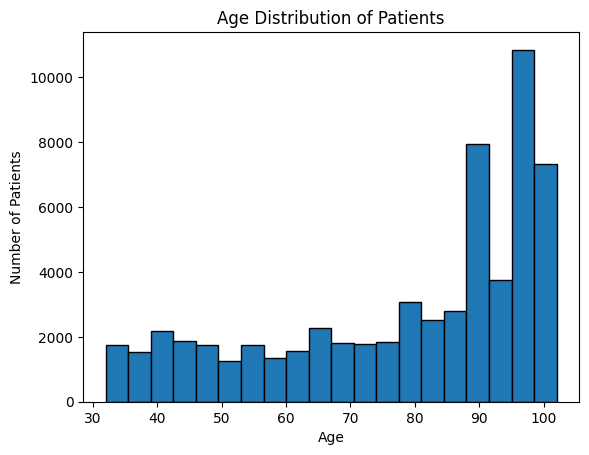

In [18]:
# 1. Age Distribution
merged_df['Age'] = merged_df['BIRTHDATE'].apply(calculate_age)
plt.hist(merged_df['Age'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Age Distribution of Patients')
plt.show()

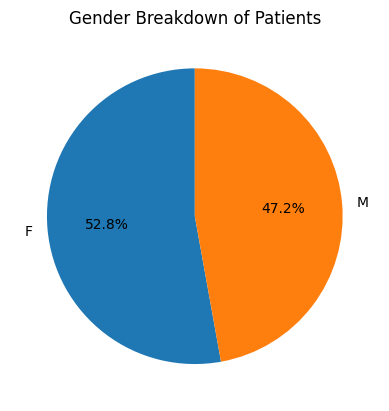

In [19]:
# 2. Gender Breakdown
merged_df['GENDER'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gender Breakdown of Patients')
plt.ylabel('')
plt.show()

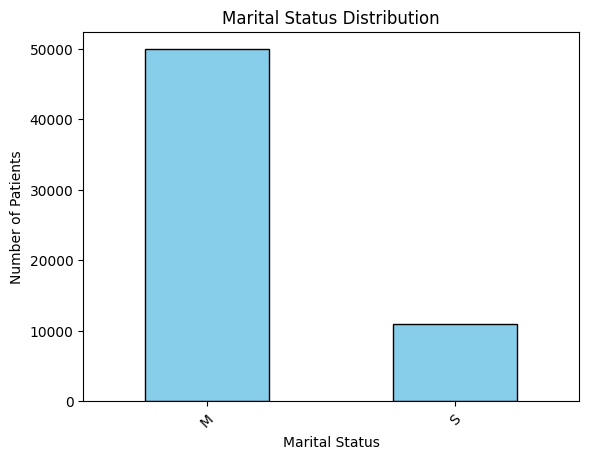

In [20]:
# 3. Marital Status Distribution
merged_df['MARITAL'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Marital Status')
plt.ylabel('Number of Patients')
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()

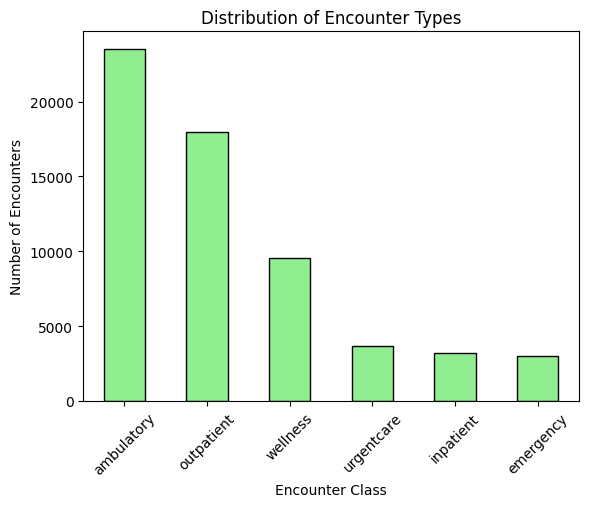

In [21]:
# 4. Encounter Types
merged_df['ENCOUNTERCLASS'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('Encounter Class')
plt.ylabel('Number of Encounters')
plt.title('Distribution of Encounter Types')
plt.xticks(rotation=45)
plt.show()

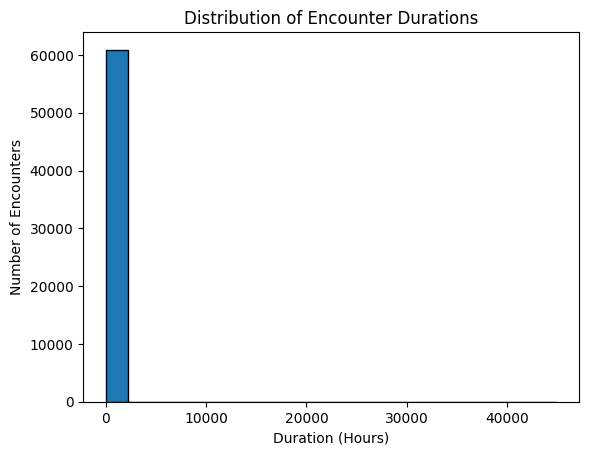

In [22]:
# 5. Encounter Duration (in hours)
merged_df['START'] = pd.to_datetime(merged_df['START'])
merged_df['STOP'] = pd.to_datetime(merged_df['STOP'])
merged_df['DURATION_HOURS'] = (merged_df['STOP'] - merged_df['START']).dt.total_seconds() / 3600
plt.hist(merged_df['DURATION_HOURS'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Duration (Hours)')
plt.ylabel('Number of Encounters')
plt.title('Distribution of Encounter Durations')
plt.show()

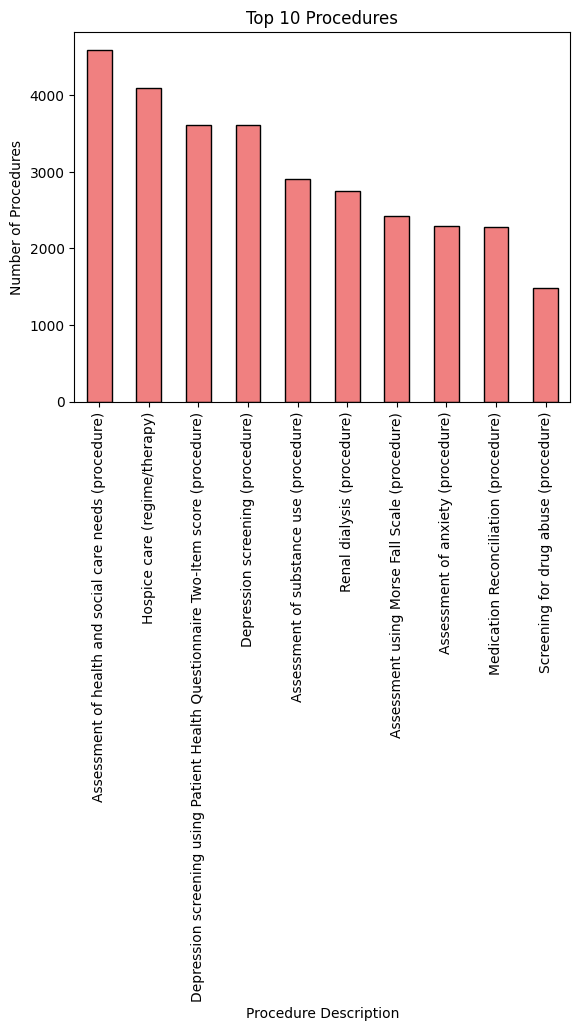

In [23]:
# 6. Procedure Frequency
merged_df['DESCRIPTION_procedure'].value_counts().head(10).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.xlabel('Procedure Description')
plt.ylabel('Number of Procedures')
plt.title('Top 10 Procedures')
plt.xticks(rotation=90)
plt.show()

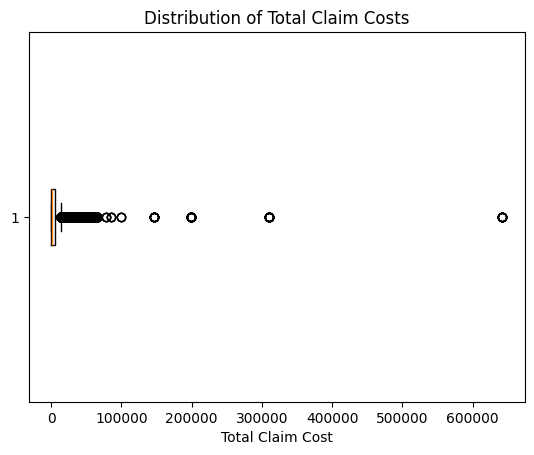

In [24]:
# 7. Encounter Cost Distribution
plt.boxplot(merged_df['TOTAL_CLAIM_COST'].dropna(), vert=False)
plt.xlabel('Total Claim Cost')
plt.title('Distribution of Total Claim Costs')
plt.show()

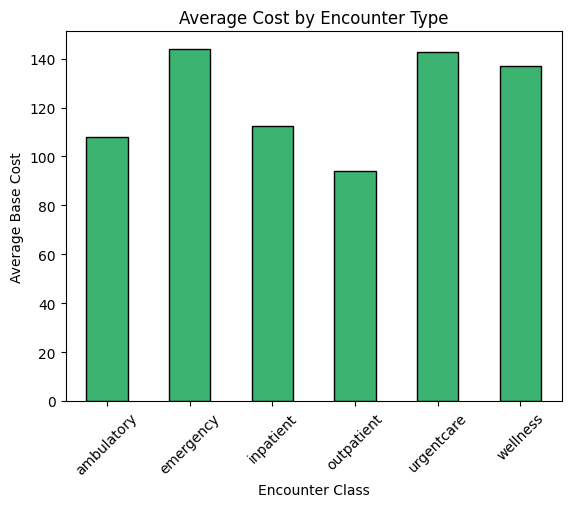

In [25]:
# 8. Cost by Encounter Type
encounter_cost = merged_df.groupby('ENCOUNTERCLASS')['BASE_ENCOUNTER_COST'].mean()
encounter_cost.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.xlabel('Encounter Class')
plt.ylabel('Average Base Cost')
plt.title('Average Cost by Encounter Type')
plt.xticks(rotation=45)
plt.show()

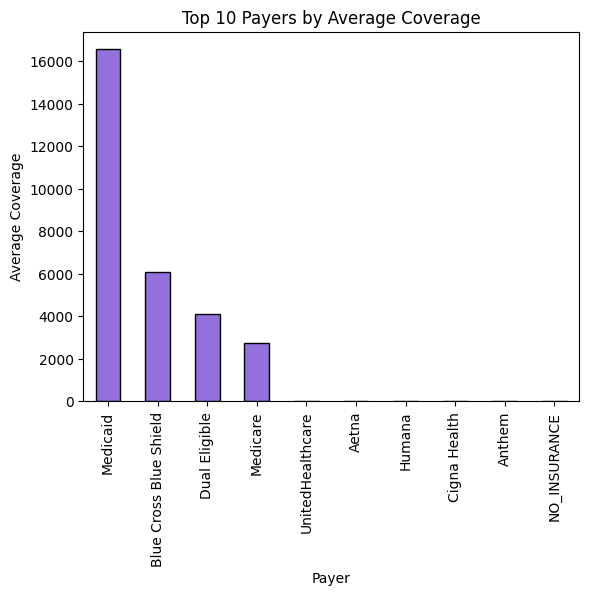

In [26]:
# 9. Payer Coverage Comparison
payer_coverage = merged_df.groupby('NAME_payer')['PAYER_COVERAGE'].mean().sort_values(ascending=False).head(10)
payer_coverage.plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.xlabel('Payer')
plt.ylabel('Average Coverage')
plt.title('Top 10 Payers by Average Coverage')
plt.xticks(rotation=90)
plt.show()

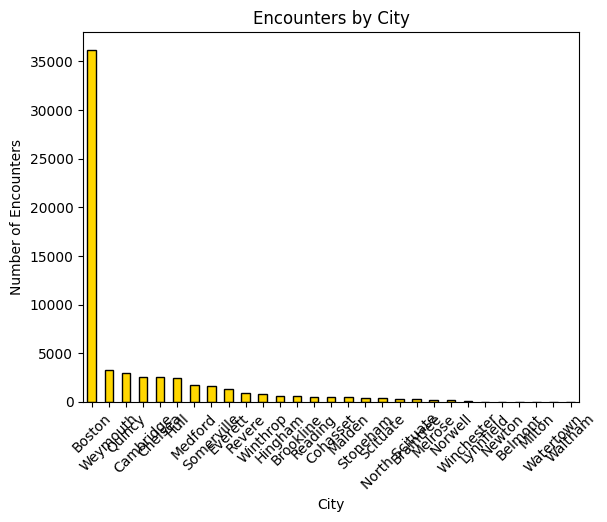

In [40]:
# 10. Encounters by Location (City)
merged_df['CITY'].value_counts().plot(kind='bar', color='gold', edgecolor='black')
plt.xlabel('City')
plt.ylabel('Number of Encounters')
plt.title('Encounters by City')
plt.xticks(rotation=45)
plt.show()

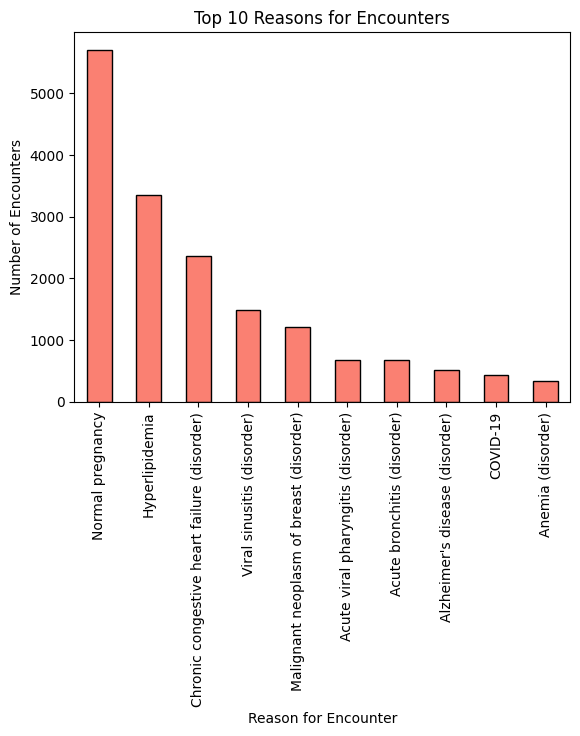

In [28]:
# 11. Reasons for Encounters
merged_df['REASONDESCRIPTION'].value_counts().head(10).plot(kind='bar', color='salmon', edgecolor='black')
plt.xlabel('Reason for Encounter')
plt.ylabel('Number of Encounters')
plt.title('Top 10 Reasons for Encounters')
plt.xticks(rotation=90)
plt.show()

/var/folders/43/9f2bqzb13f58kthgs4zygq1w0000gn/T/ipykernel_28706/2463697425.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  procedure_age_group = merged_df.pivot_table(index='Age Group', columns='DESCRIPTION_procedure', aggfunc='size', fill_value=0)


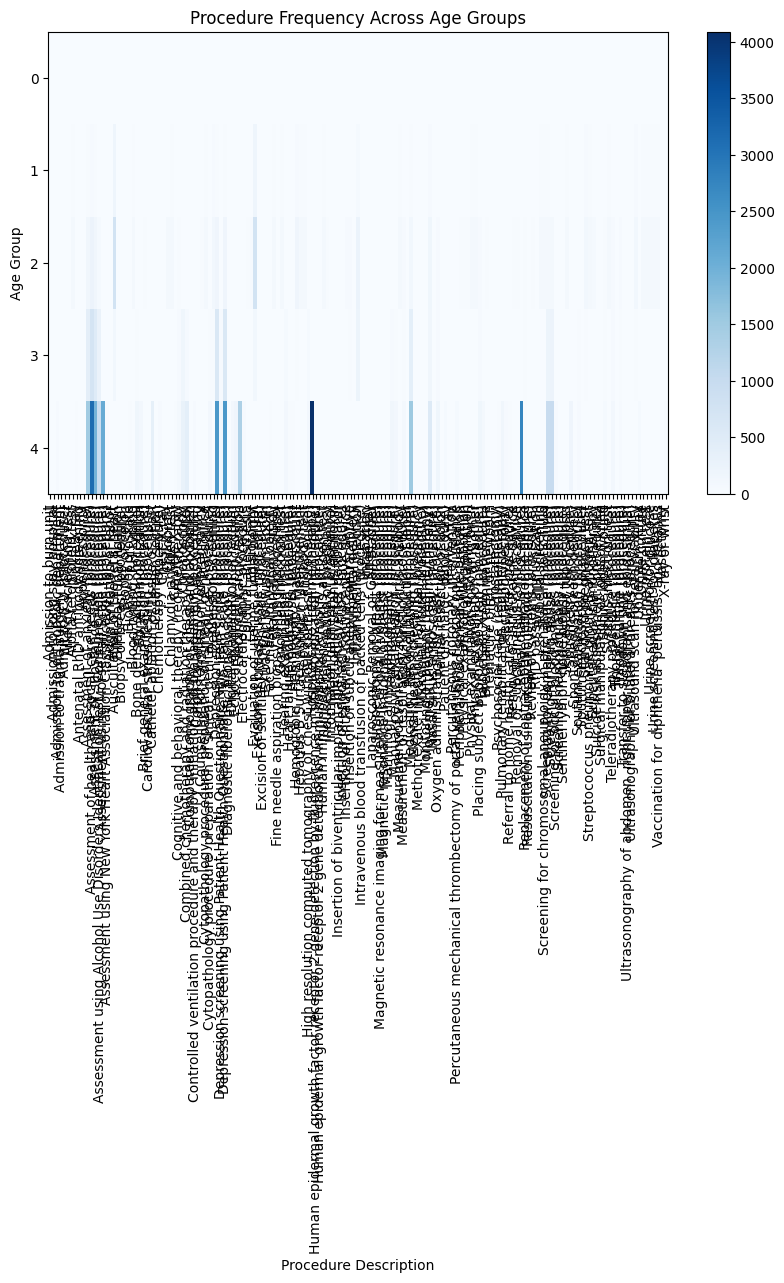

In [29]:
# 12. Procedures for Different Age Groups
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '66+']
merged_df['Age Group'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels)
procedure_age_group = merged_df.pivot_table(index='Age Group', columns='DESCRIPTION_procedure', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
plt.imshow(procedure_age_group, aspect='auto', cmap='Blues')
plt.xlabel('Procedure Description')
plt.ylabel('Age Group')
plt.title('Procedure Frequency Across Age Groups')
plt.colorbar()
plt.xticks(ticks=np.arange(len(procedure_age_group.columns)), labels=procedure_age_group.columns, rotation=90)
plt.show()

/var/folders/43/9f2bqzb13f58kthgs4zygq1w0000gn/T/ipykernel_28706/1189111985.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df['MONTH'] = merged_df['START'].dt.to_period('M')


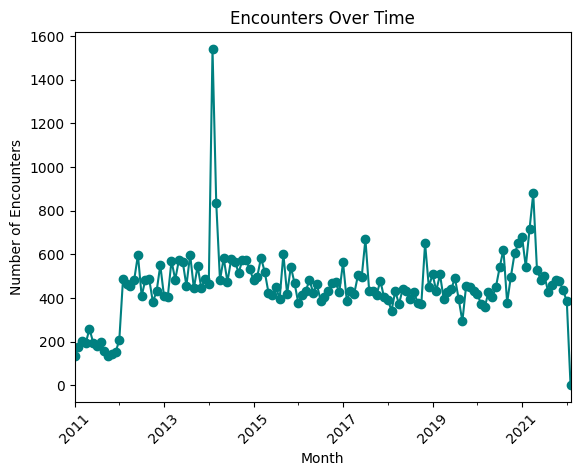

In [30]:
# 13. Encounters Over Time
merged_df['MONTH'] = merged_df['START'].dt.to_period('M')
encounters_over_time = merged_df['MONTH'].value_counts().sort_index()
encounters_over_time.plot(kind='line', marker='o', color='teal')
plt.xlabel('Month')
plt.ylabel('Number of Encounters')
plt.title('Encounters Over Time')
plt.xticks(rotation=45)
plt.show()

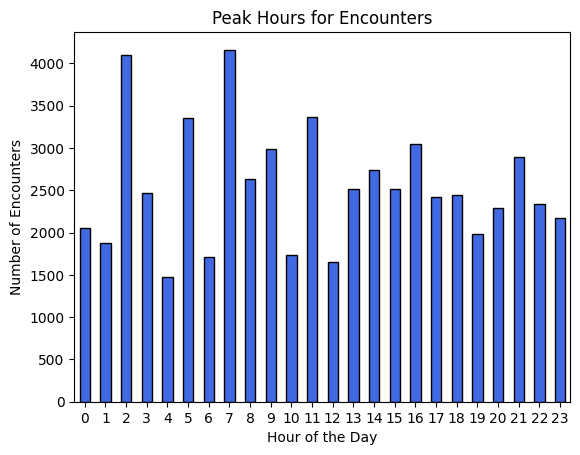

In [31]:
# 14. Peak Hours for Encounters
merged_df['HOUR'] = merged_df['START'].dt.hour
merged_df['HOUR'].value_counts().sort_index().plot(kind='bar', color='royalblue', edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Encounters')
plt.title('Peak Hours for Encounters')
plt.xticks(rotation=0)
plt.show()

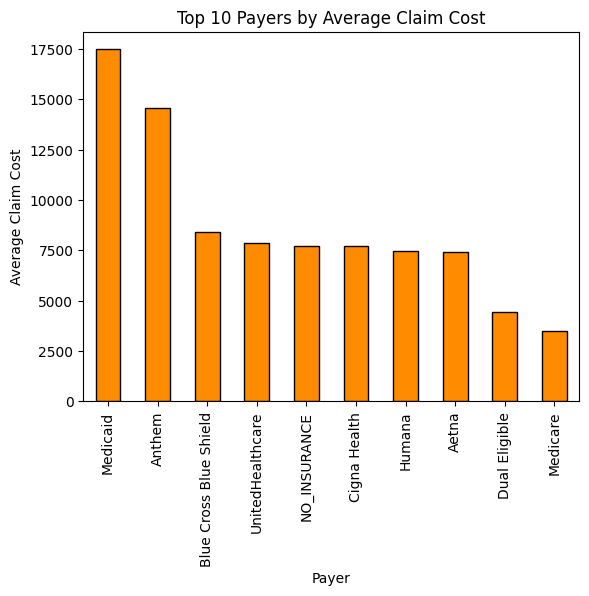

In [32]:
# 15. Claims and Costs by Payer
payer_claims_cost = merged_df.groupby('NAME_payer')['TOTAL_CLAIM_COST'].mean().sort_values(ascending=False).head(10)
payer_claims_cost.plot(kind='bar', color='darkorange', edgecolor='black')
plt.xlabel('Payer')
plt.ylabel('Average Claim Cost')
plt.title('Top 10 Payers by Average Claim Cost')
plt.xticks(rotation=90)
plt.show()

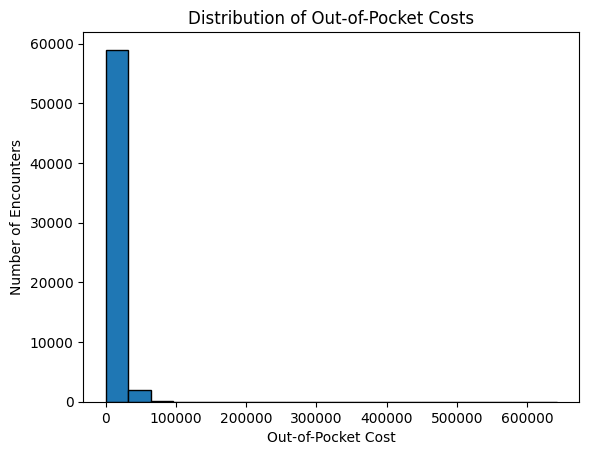

In [33]:
# 16. Out-of-Pocket Costs
merged_df['OUT_OF_POCKET'] = merged_df['TOTAL_CLAIM_COST'] - merged_df['PAYER_COVERAGE']
plt.hist(merged_df['OUT_OF_POCKET'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Out-of-Pocket Cost')
plt.ylabel('Number of Encounters')
plt.title('Distribution of Out-of-Pocket Costs')
plt.show()